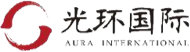

- 需求：
    - 1.将人口数据和各州简称数据进行整合且删除其中重复的abbreviation列
    - 2.查看整合数据中是否存在缺失数据的列且计算出缺失数据的占比
    - 3.将州的全程state中空值对应的简称找到，对找到的简称进行去重操作
    - 4.为state项中的缺失值补上正确的值，从而去除掉state这一列的所有NaN
    - 5.在现有数据的基础上将各州面积数据areas进行整合
    - 6.我们会发现area(sq.mi)这一列有缺失数据，找出是哪些行
    - 7.去除所有含有缺失数据的行数据
    - 8.找出2010年的全民人口数据



In [23]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [24]:
#1.加载数据 ./data/state-abbrevs.csv
abb = pd.read_csv('./data/state-abbrevs.csv')
abb.head(2) #state州的全称，abbreviation州的简称

,state,abbreviation
0,Alabama,AL
1,Alaska,AK


In [25]:
#./data/state-population.csv
pop = pd.read_csv('./data/state-population.csv')
pop.head(2) #state/region州的简称，ages年龄，year年份，population人口数量

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0


In [26]:
#./data/state-areas.csv
area = pd.read_csv('./data/state-areas.csv')
area.head(2) #state州的全称，area (sq. mi)州的面积

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425


In [27]:
#可以将人口数据pop和州的数据abb进行汇总
abb_pop = pd.merge(left=abb,right=pop,how='outer',left_on='abbreviation',right_on='state/region')
abb_pop.head(5)

,state,abbreviation,state/region,ages,year,population
0,Alabama,AL,AL,under18,2012,1117489.0
1,Alabama,AL,AL,total,2012,4817528.0
2,Alabama,AL,AL,under18,2010,1130966.0
3,Alabama,AL,AL,total,2010,4785570.0
4,Alabama,AL,AL,under18,2011,1125763.0


In [28]:
#将合并的数据中重复的abbreviation列进行删除
abb_pop.drop(columns='abbreviation',inplace=True)

In [29]:
#查看存在缺失数据的列，缺缺失值的占比
for col in abb_pop.columns:
    if abb_pop[col].isnull().sum() > 0:
        null_count = abb_pop[col].isnull().sum()
        p = null_count / abb_pop[col].size
        print('%s列中存在空值的个数为%d，占比为%f'%(col,null_count,p))

state列中存在空值的个数为96，占比为0.037736
population列中存在空值的个数为20，占比为0.007862


In [30]:
#将州的全程state中空值对应的简称找到，对找到的简称进行去重操作
null_df = abb_pop.loc[abb_pop['state'].isnull()] #获取了state列中空值对应的行数据
null_df['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [31]:
#对state列中的空值数据进行清洗操作：将其空值填充为PR和USA的全程即可
pr_df = abb_pop.loc[abb_pop['state/region'] == 'PR'] #PR对应的行数据
indexs = pr_df.index

abb_pop.loc[indexs,'state'] = 'PPPRRR'

In [35]:
usa_df = abb_pop.loc[abb_pop['state/region'] == 'USA'] #USA对应的行数据
indexs = usa_df.index
abb_pop.loc[indexs,'state'] = 'United states'

In [38]:
#合并各州面积数据areas
abb_pop_area = pd.merge(left=abb_pop,right=area,on='state',how='outer')

In [41]:
# 我们会发现area(sq.mi)这一列有缺失数据，找出是哪些行
# 去除含有缺失数据的行
abb_pop_area.loc[abb_pop_area['area (sq. mi)'].isnull()].index

Int64Index([2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458,
            2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469,
            2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480,
            2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491,
            2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502,
            2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513,
            2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524,
            2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535,
            2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543],
           dtype='int64')

In [42]:
abb_pop_area.dropna(axis=0,inplace=True)

In [44]:
# 找出2010年的全民人口数据（条件查询）
abb_pop_area.query('year == 2010 & ages == "total"')

,state,state/region,ages,year,population,area (sq. mi)
3,Alabama,AL,total,2010.0,4785570.0,52423.0
91,Alaska,AK,total,2010.0,713868.0,656425.0
101,Arizona,AZ,total,2010.0,6408790.0,114006.0
189,Arkansas,AR,total,2010.0,2922280.0,53182.0
197,California,CA,total,2010.0,37333601.0,163707.0
283,Colorado,CO,total,2010.0,5048196.0,104100.0
293,Connecticut,CT,total,2010.0,3579210.0,5544.0
379,Delaware,DE,total,2010.0,899711.0,1954.0
389,District of Columbia,DC,total,2010.0,605125.0,68.0
475,Florida,FL,total,2010.0,18846054.0,65758.0
